<a href="https://colab.research.google.com/github/lphuong304/CS114.L21/blob/main/COLAB_ASSIGNMENTS/ASIGNMENT_COLAB_01_12_04_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1><center><center><center>BÀI TẬP COLAB SỐ 01 - 12/04/2001</center></h1>**
**<h1><center><center><center>RECOGNIZING HAND-WRITTEN DIGITS</center></h1>**
###LỚP: CS114.L21
###NHÓM:
1. Nguyễn Ngọc Lan Phương - *19520227*
2. Hoàng Anh Tú - *19522450*
3. Nguyễn Quốc Huy - *19521623*

###Nguồn tham khảo:

1. Recognizing hand-written digits - [LINK](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py)

Ví dụ này sử dụng thư viện scikit-learn để nhận viện số viết tay (từ 0 - 9).

Đầu tiên ta import các thư viện cần thiết.

In [ ]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

Automatically created module for IPython interactive environment


###DỮ LIỆU CHỮ SỐ

Tập dữ liệu chữ số bao gồm hình ảnh của các chữ số có độ phân giải là 8x8 pixel. Thuộc tính hình ảnh của tập dữ liệu là một mảng có kích thước 8x8 thể hiện thang độ xám của mỗi hình. Chúng ta sẽ sử dụng các mảng này để hình dung 4 hình ảnh đầu tiên.  Thuộc tính target của tập dữ liệu lưu trữ chữ số mà mỗi hình ảnh đại diện và điều này được bao gồm trong tiêu đề của 4 ô bên dưới. 

**Lưu ý**: nếu ta làm việc với tệp hình ảnh (ví dụ: tệp ‘png '), sử dụng **matplotlib.pyplot.imread** để tải hình ảnh.

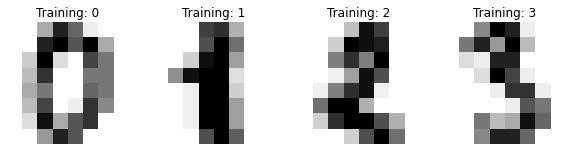

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

Demo bộ datasets bằng cách truy xuất hình ảnh chữ số đầu tiên của bộ datasets 

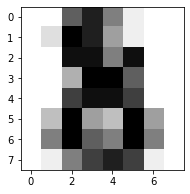

array([[ 0.,  0., 10., 14.,  8.,  1.,  0.,  0.],
       [ 0.,  2., 16., 14.,  6.,  1.,  0.,  0.],
       [ 0.,  0., 15., 15.,  8., 15.,  0.,  0.],
       [ 0.,  0.,  5., 16., 16., 10.,  0.,  0.],
       [ 0.,  0., 12., 15., 15., 12.,  0.,  0.],
       [ 0.,  4., 16.,  6.,  4., 16.,  6.,  0.],
       [ 0.,  8., 16., 10.,  8., 16.,  8.,  0.],
       [ 0.,  1.,  8., 12., 14., 12.,  1.,  0.]])

In [ ]:
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
digits.images[-1]

Ta nhận thấy rằng bộ datas gồm những hình ảnh có kích thước là (8,8) pixels, là một mảng 2 chiều các phần tử nằm trong khoảng $[0,16]$ và có kích thước là $8$x$8$ pixels.

  Để xử lý hình ảnh có kích thước 8x8 như trên, ta phải chuyển nó về một vector đặc trưng có độ dài là 64.

###PHÂN LỚP
Để tiến hành phân loại trên bộ dữ liệu này, ta cần "làm phẳng" các hình ảnh, chuyển từng mảng 2 chiều các giá trị thang độ xám từ kích thước là (8, 8) sang kích thước (64,).  Sau đó, toàn bộ tập dữ liệu sẽ có dạng là (n_samples, n_features).

Trong đó:
* n_samples là số lượng hình ảnh
* n_features là tổng số pixel trong mỗi hình ảnh.


In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

Sử dụng thư viện hỗ trợ giải thuật SVM (support vector metrics) trong scikit-learn là **SVC** để phân loại mẫu lớp với tham số $C = 0.001$

In [ ]:
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)
#clf.fit(data[:n_samples], digits.target[:n_samples])

Ta sẽ chia tập dữ liệu **digits** một cách ngẫu nhiên theo tỉ lệ 50% dùng để traning, 50% dùng để test và demo hai tập trên. Lưu ý kích thước trả về 

In [ ]:
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

print('X_train',X_train[0])
print('X_test', X_test[0])
print('y_train',y_train[0])
print('y_test', y_test[0])

X_train [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
X_test [ 0.  0.  1. 11. 14. 15.  3.  0.  0.  1. 13. 16. 12. 16.  8.  0.  0.  8.
 16.  4.  6. 16.  5.  0.  0.  5. 15. 11. 13. 14.  0.  0.  0.  0.  2. 12.
 16. 13.  0.  0.  0.  0.  0. 13. 16. 16.  6.  0.  0.  0.  0. 16. 16. 16.
  7.  0.  0.  0.  0. 11. 13. 12.  1.  0.]
y_train 0
y_test 8


Cho mẫu học từ tập dữ train và dự đoán trên tập dữ liệu test

In [ ]:
# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

Để dễ hình dung hơn ta hiển thị giá trị chữ số và dự đoán chúng trên tiêu đề đối với 4 chữ số đầu tiên của tập dữ liệu test

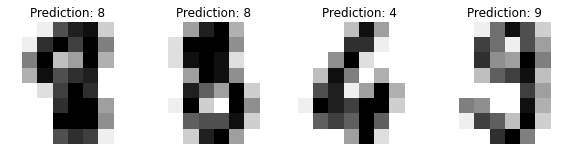

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

Module **metrics.classification_report** đánh giá tập train qua các chỉ số phân loại chính (precison, recall, f1-score, support)

In [ ]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

Để nhìn rõ hơn về các điểm dữ liệu trong hệ thống phân lớp chữ số này được phân loại đúng sai như thế nào, ta trực quan nó với Confusion Matrix.

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


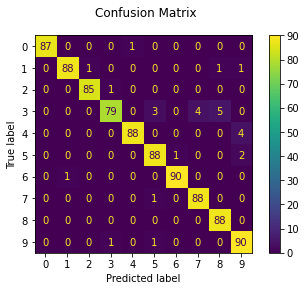

In [ ]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

### DỰ ĐOÁN CHỮ SỐ TỪ ẢNH CHỤP 



In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo_1.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo_1.jpg


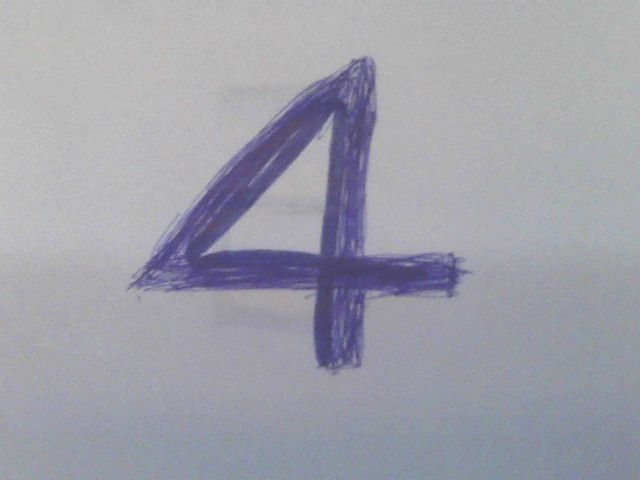

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))
  

<a name ="xulyhinhanh"></a>
#### ***Tiền xử lý hình ảnh***

1. Vì hình ảnh trong bộ dữ liệu digits datastes là hình trắng đen (nền đen, chữ trắng) nên bước đầu chúng em chuyển hình ảnh sang màu trắng đen.
2. Nhằm hạn chế mất mát dữ liệu nhất trong quá trình resize hình về kích thước (8x8) pixels dẫn đến kết quả dự đoán sai, chúng em crop hình dựa vào giá trị pixel của các màu (cụ thể là trắng và đen)
* Pixel màu nền lớn hơn hoặc bằng 95
* Pixel màu nét chữ bé hơn 95


**Hàm tiền xử lý hình ảnh:** 

In [ ]:
#hàm cắt hình ảnh, loại bỏ tối đa nền trắng
def crop_img(inImg):
  inImg = 255 - inImg[:, :]

  maxUp = inImg.shape[0]//2
  maxDown = inImg.shape[0]//2
  maxLeft = inImg.shape[1]//2
  maxRight = inImg.shape[1]//2

  for i in range(inImg.shape[0]):
    for j in range(inImg.shape[1]):
      if inImg[i][j] > 160:
        if maxUp >= i: maxUp = i
        if maxDown <= i: maxDown = i
        if maxLeft >= j: maxLeft = j
        if maxRight <= j: maxRight = j

  editedImg = inImg[maxUp:maxDown+1, maxLeft:maxRight+1] 
  return editedImg

Ta xử lý ảnh với tấm hình vừa chụp từ camera laptop

Gray image: 


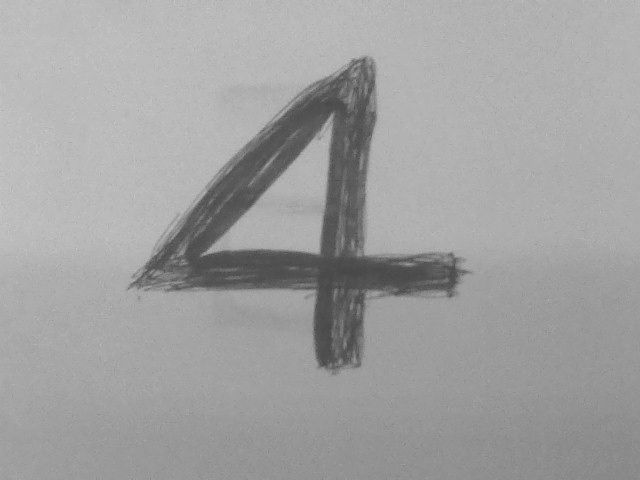

Croppped image: 


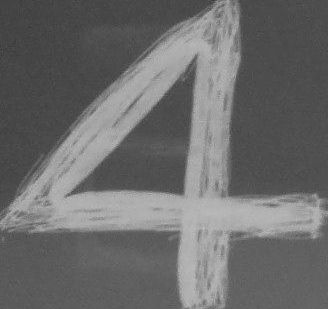

Resized image: 


array([[ 69,  71,  70,  77,  82, 141,  76,  82],
       [ 72,  67,  76,  94, 161, 170,  76,  79],
       [ 72,  71, 117, 173,  76, 132,  74,  78],
       [ 70,  83, 170,  80,  77, 145,  78,  78],
       [ 74, 140,  78,  77,  87, 139,  78,  76],
       [126, 174, 166, 174, 175, 180, 177, 172],
       [ 90,  90,  99,  89, 174, 158,  94,  96],
       [ 92,  91,  94,  93, 174, 130,  99, 100]], dtype=uint8)

In [ ]:
path_img = "/content/photo_1.jpg" #lấy đường dẫn hình ảnh

gray_image = cv2.imread(path_img, 0) #đọc hình và chuyển về ảnh trắng đen
print('Gray image: ')
cv2_imshow(gray_image)

croppedImg = crop_img(gray_image)
print('Croppped image: ')
cv2_imshow(croppedImg)

resizedImg =  cv2.resize(croppedImg,(8,8))
print('Resized image: ')
cv_imshow(resizedImg)
resizedImg

### PREDICT HÌNH ẢNH SAU KHI ĐÃ XỬ LÝ

Đưa dữ liệu hình vào bộ dữ liệu ta được kết quả như sau

**Lưu ý**: Yêu cầu để đạt được kết quả tốt nhất, dữ liệu đầu vào phụ thuộc nhiều vào giá trị pixel giữa nền và nét chữ số. 

Text(0.5, 1.0, 'Prediction: [4]')

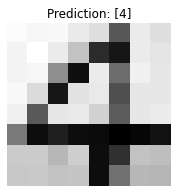

In [ ]:
input_data = resizedImg/16
predict_input_data = clf.predict(input_data.reshape(1,64))
_, ax = plt.subplots(figsize=(4, 3))
ax.set_axis_off()
image = resizedImg
ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
ax.set_title(f'Prediction: {predict_input_data}')

Trường hợp trên, data dùng để dự đoán chữ số viết tay ở có thuộc tính tốt,nét chữ to, tách biệt với nền trắng, ánh sáng và góc chụp qua bước tiền xử lý phù hợp với bộ dữ liệu digits datasets của sklearn => dự đoán với độ chính xác cao.

Tuy nhiên để đưa ra nhận xét đánh giá bộ dữ liệu một cách chính xác và khách quan nhất, chúng em sẽ dự đoán số từ tập hình ảnh tìm kiếm được.

PREDICT CÁC SỐ TỪ BỘ DỮ LIỆU HÌNH ẢNH CÓ SẴN

Liên kết với google drive để thêm tệp hình ảnh vào colab.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Gắn tệp *data_digits_number* từ drive vào colab



Truy xuất thông tin về bộ tệp dữ liệu ảnh đầu vào

Số lượng hình ảnh trong tập dữ liệu: 25


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until exp

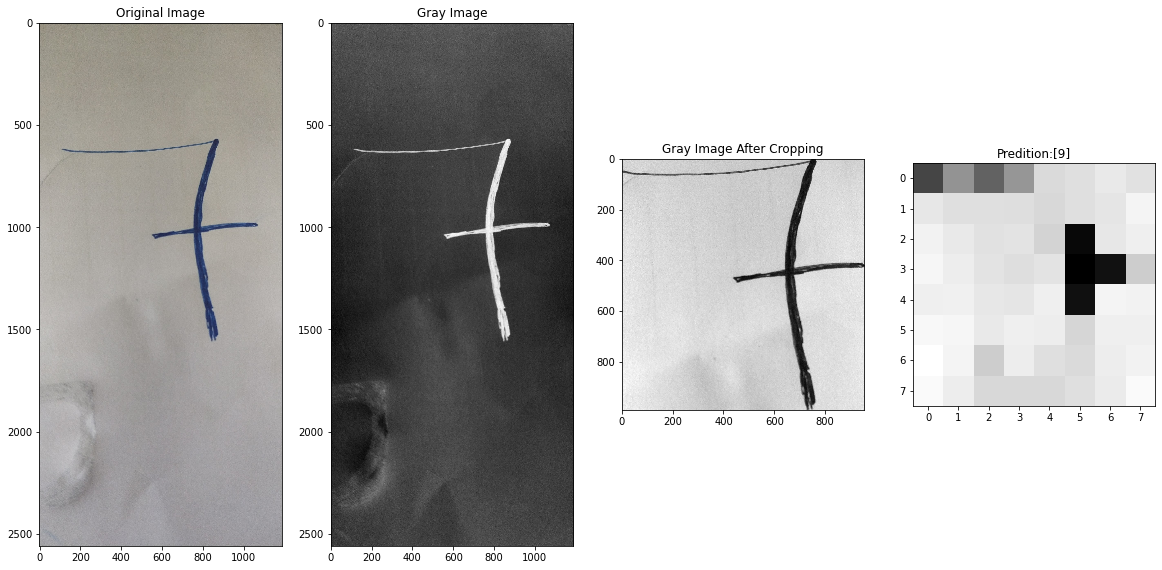

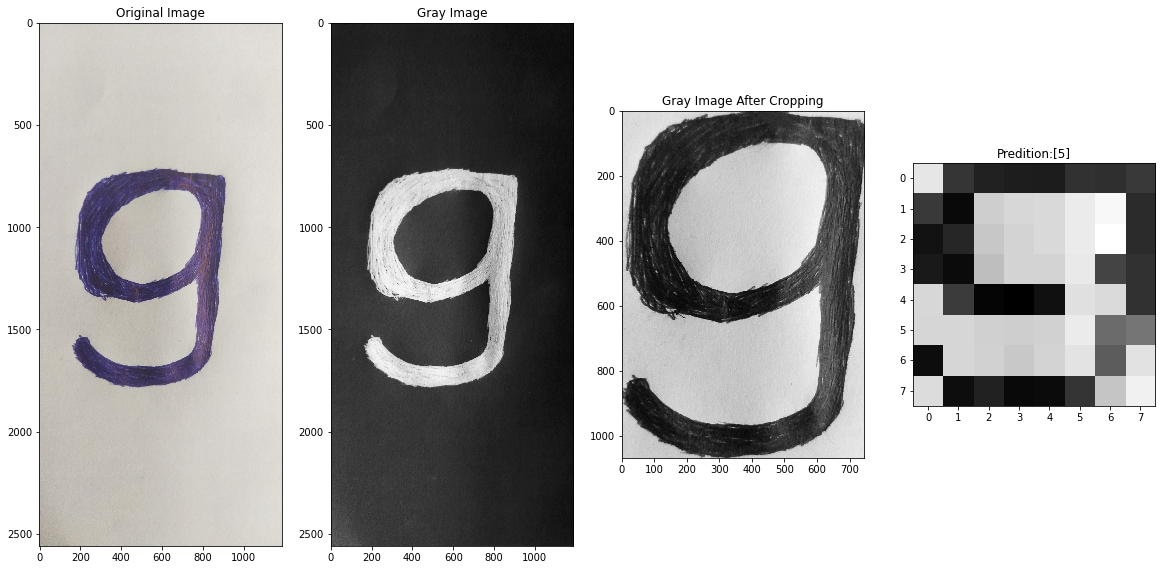

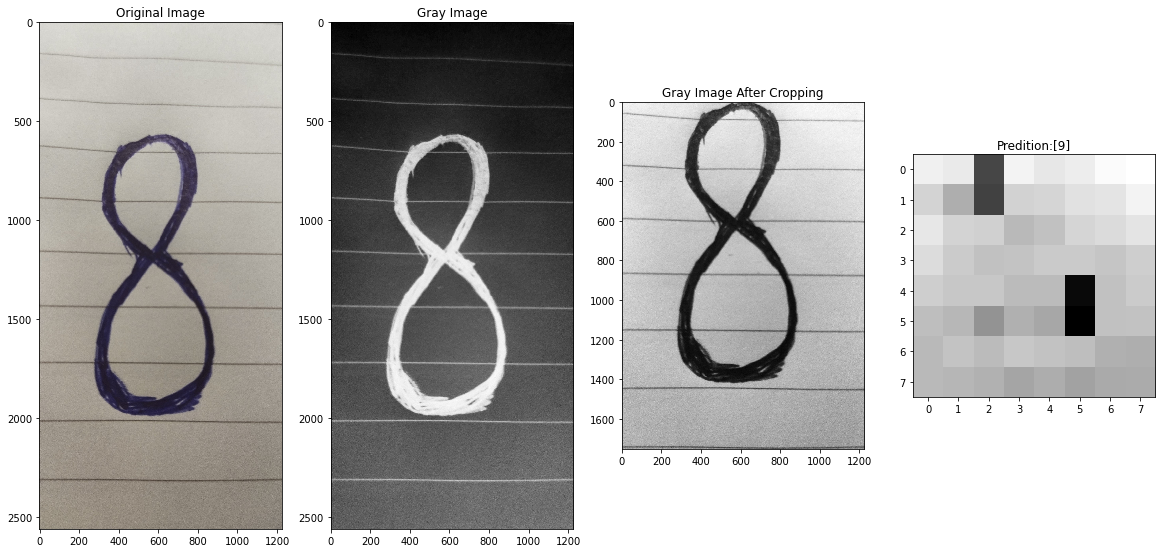

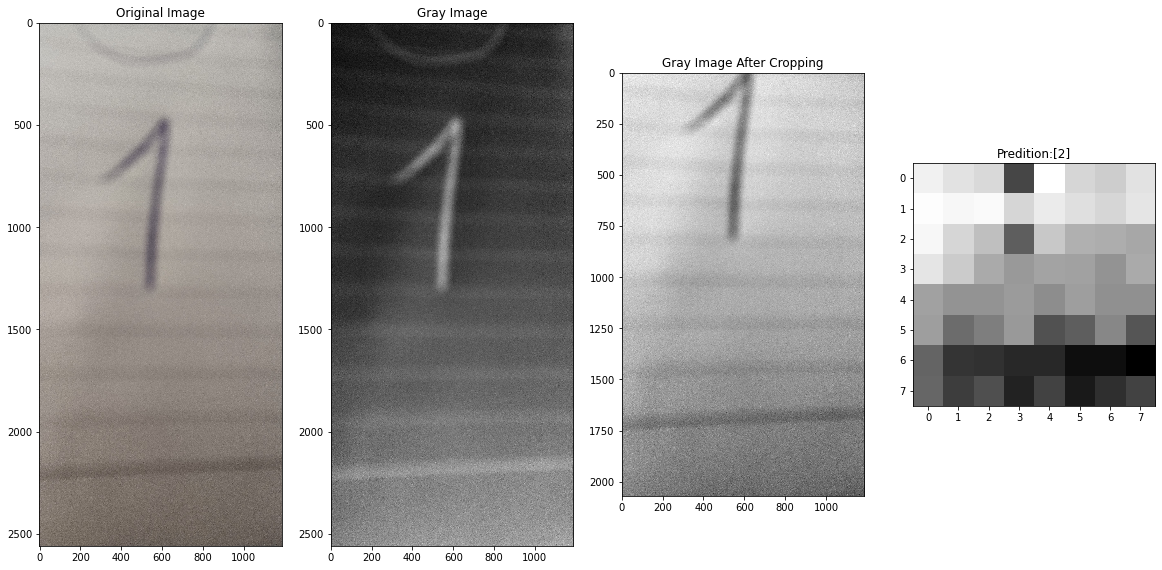

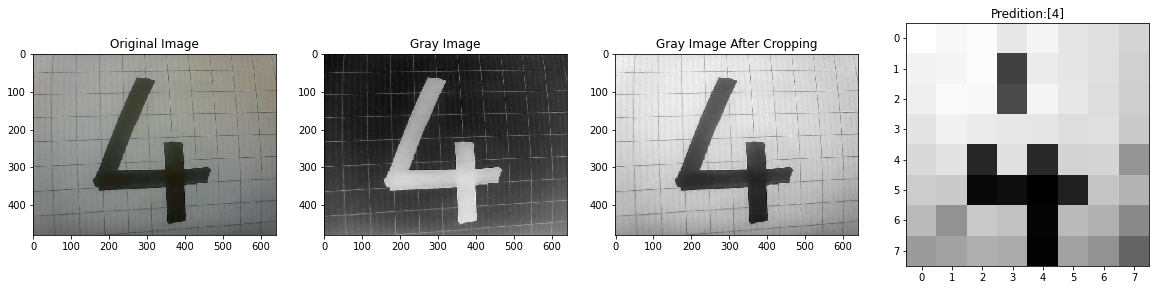

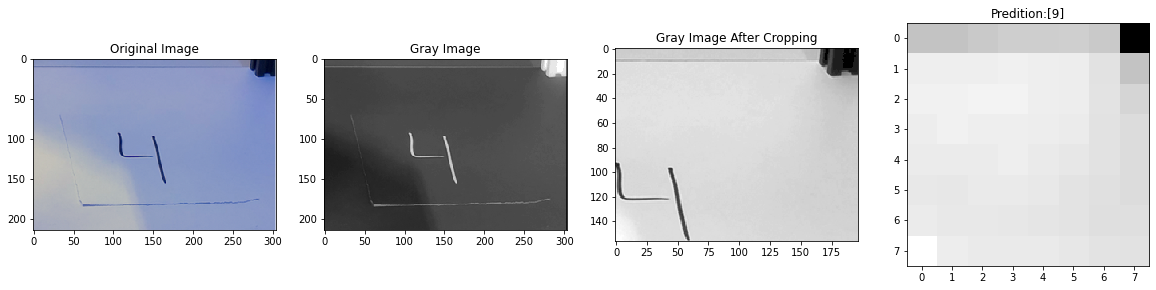

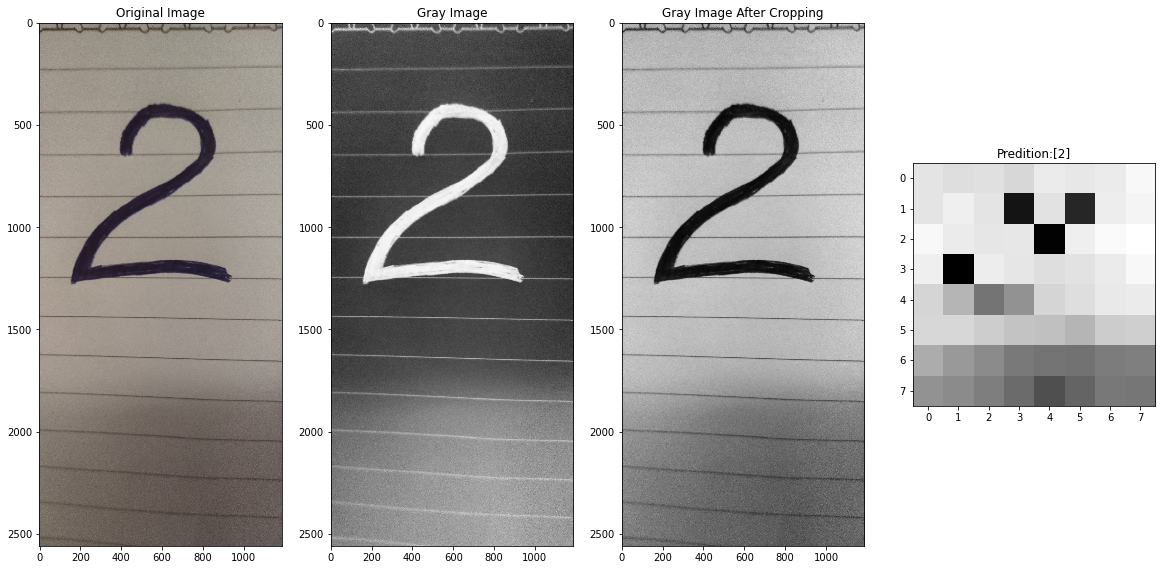

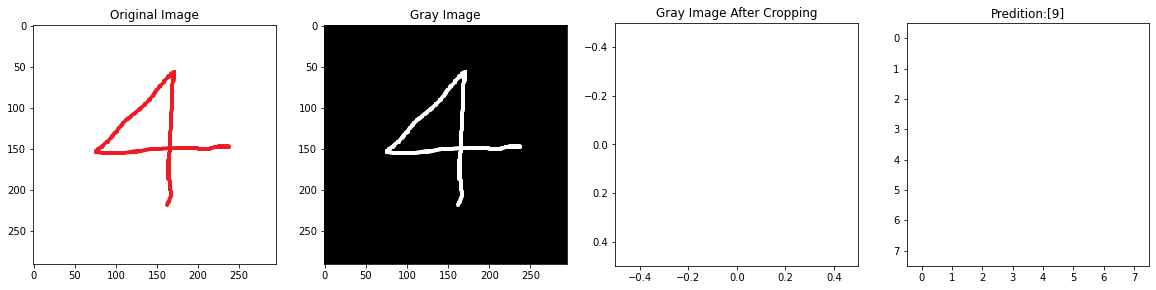

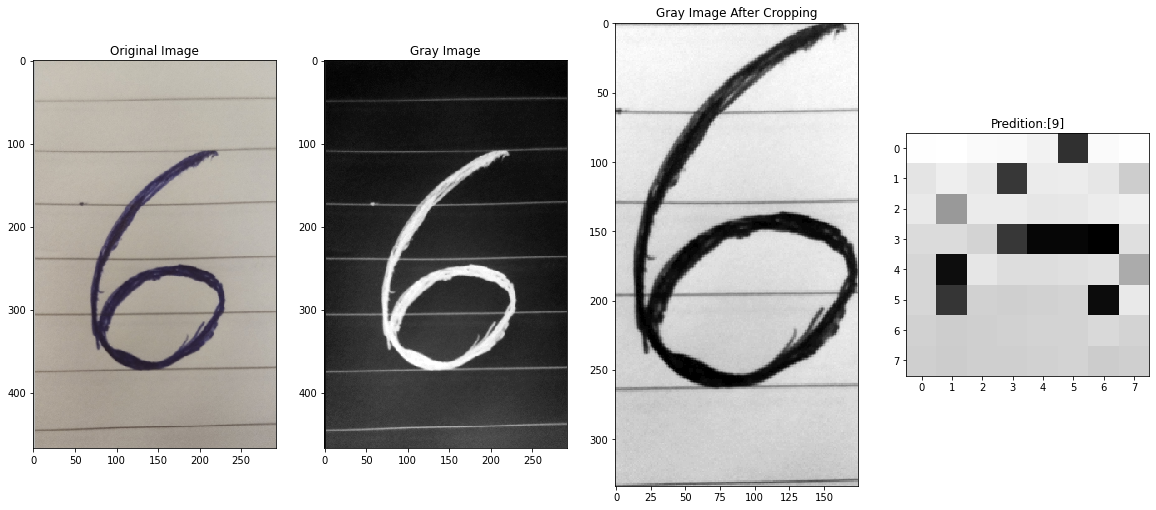

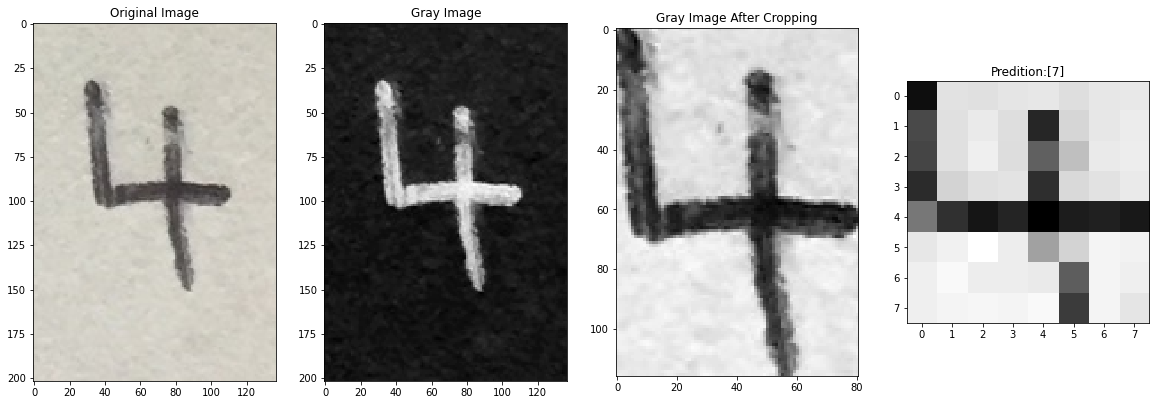

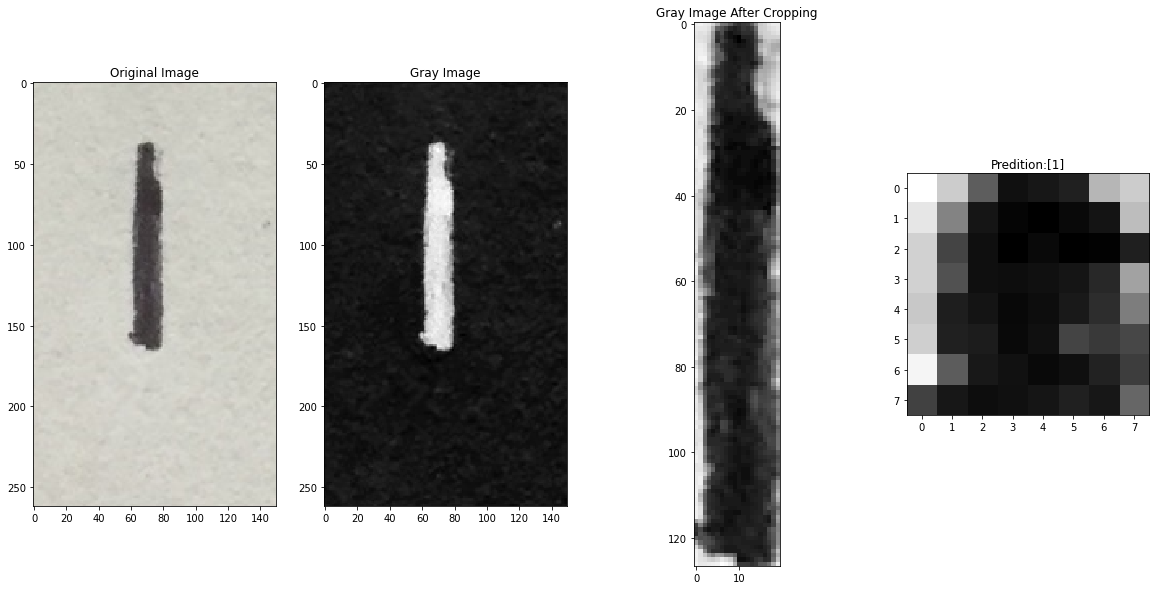

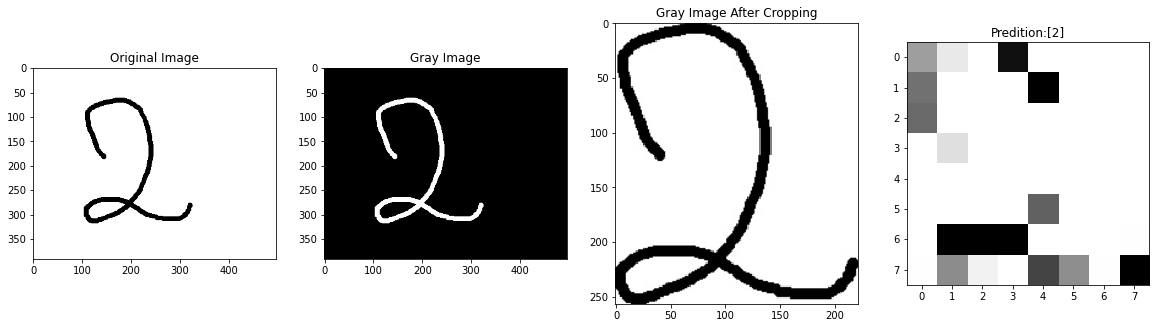

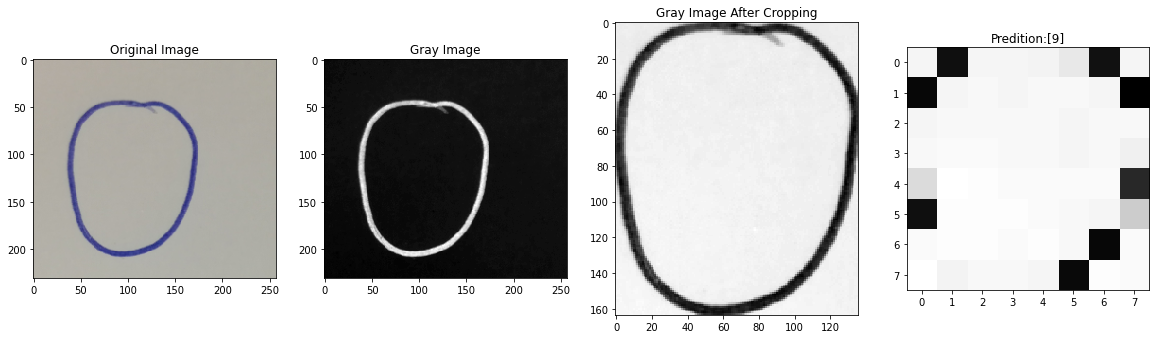

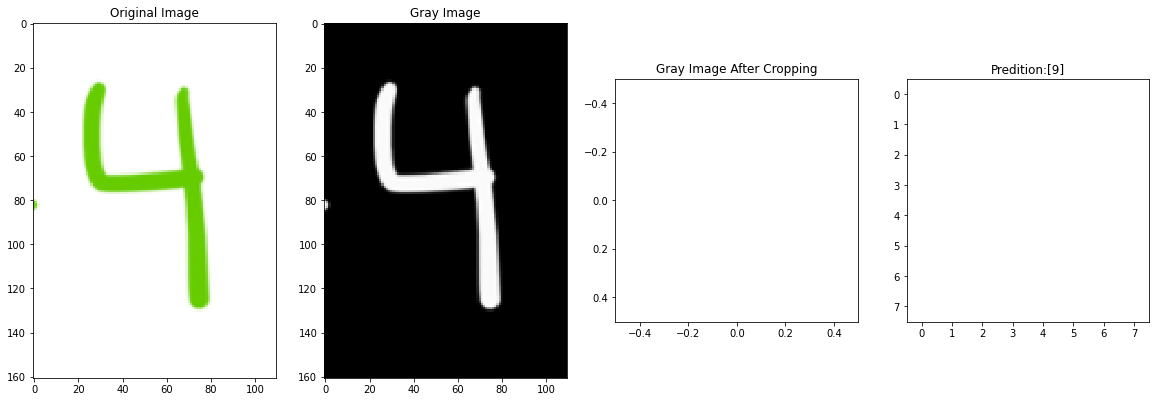

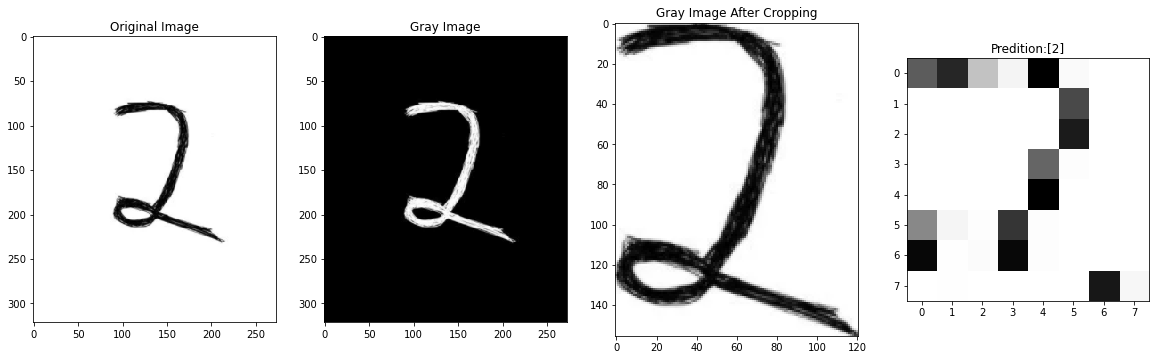

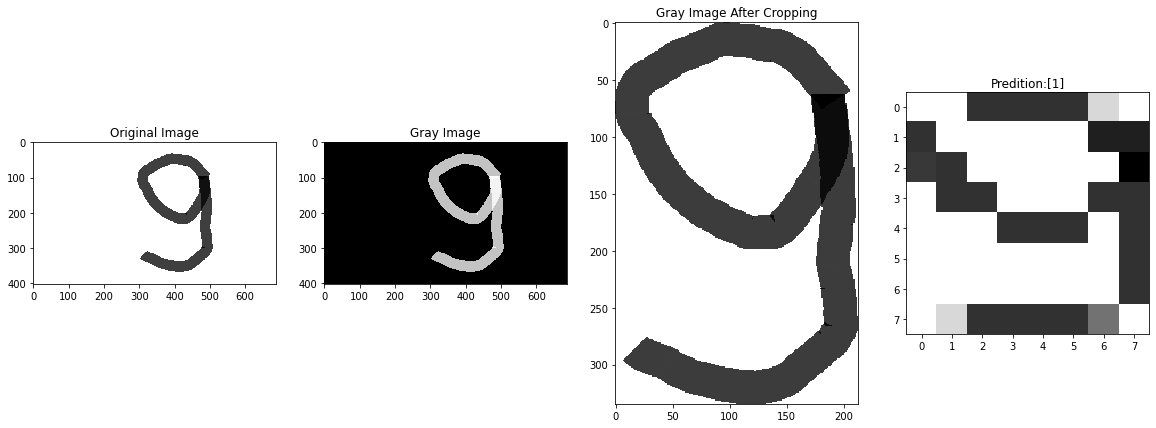

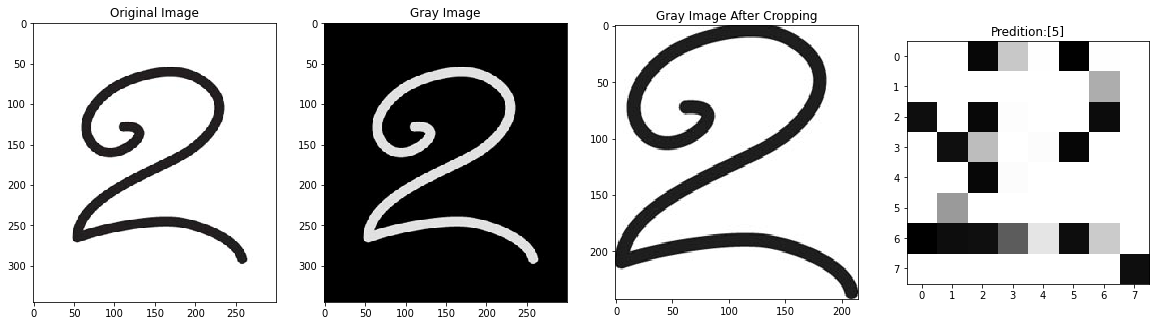

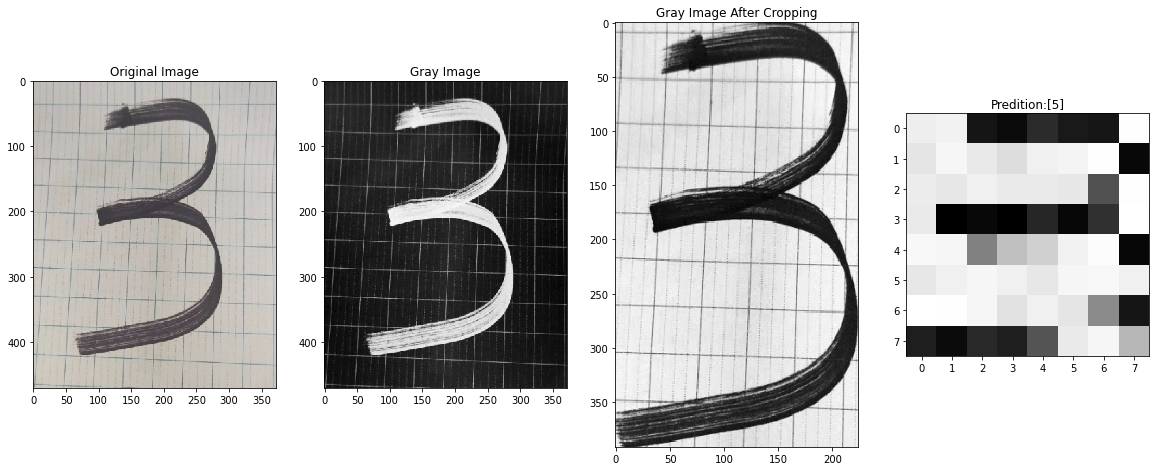

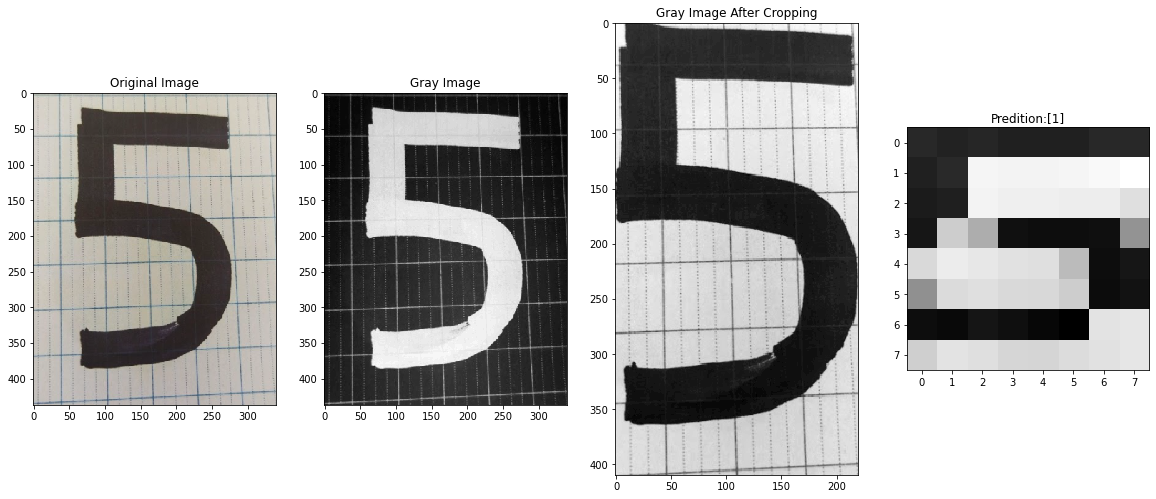

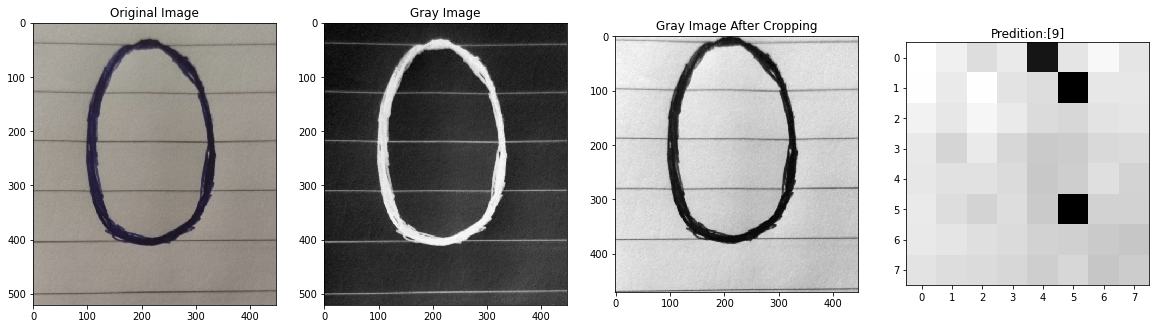

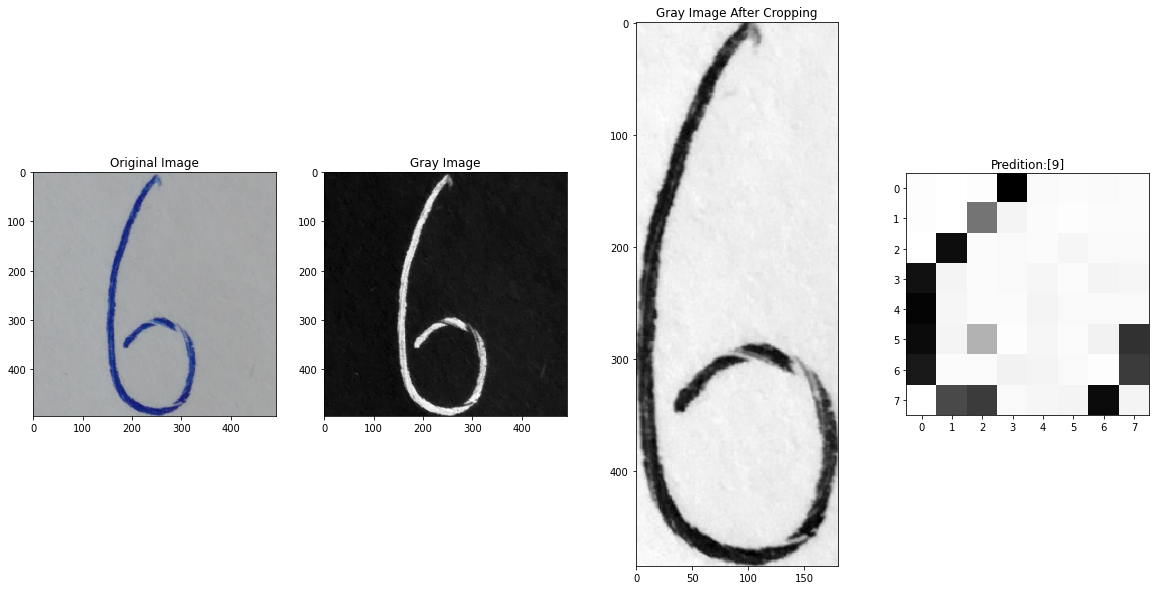

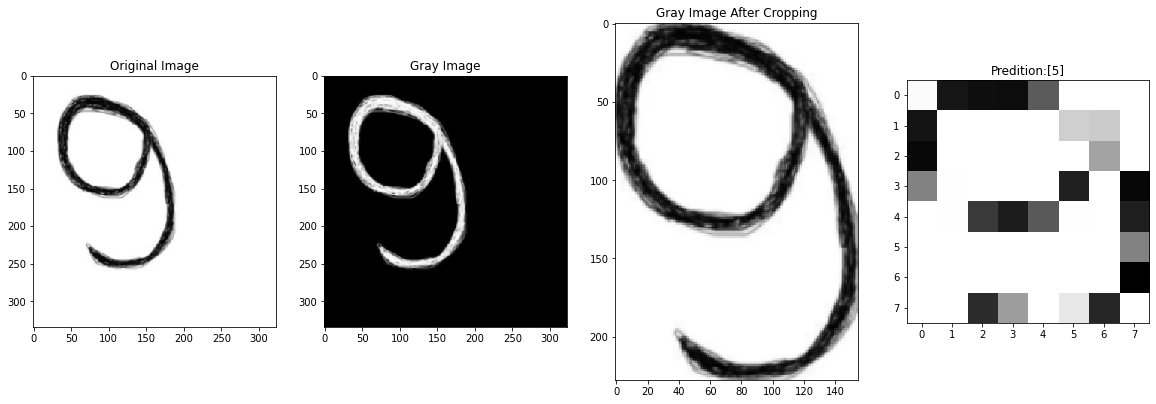

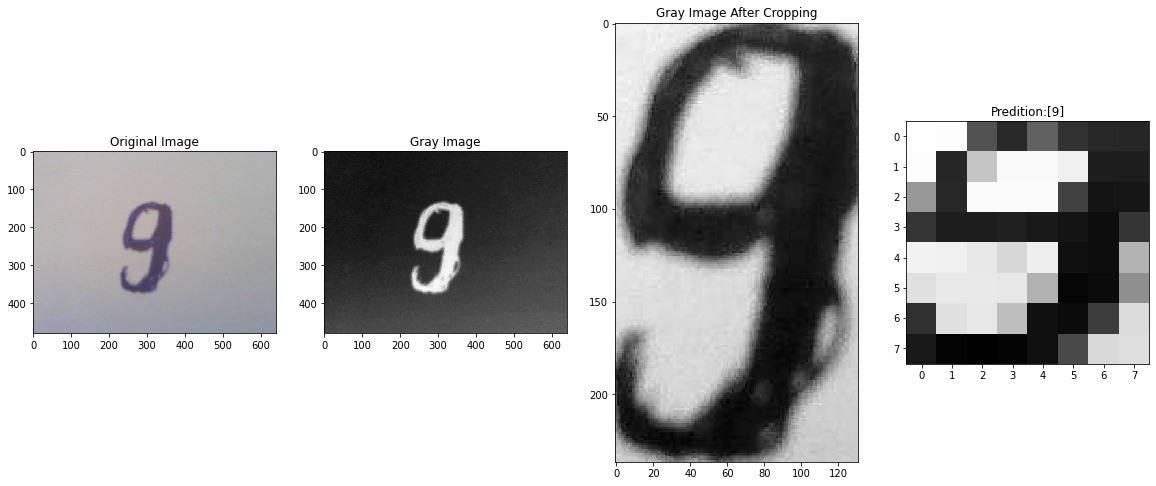

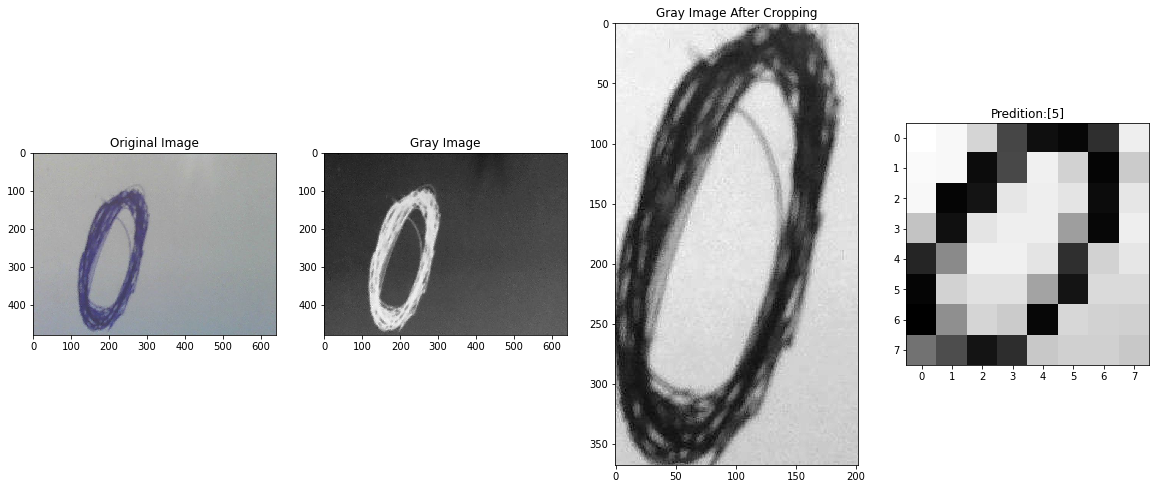

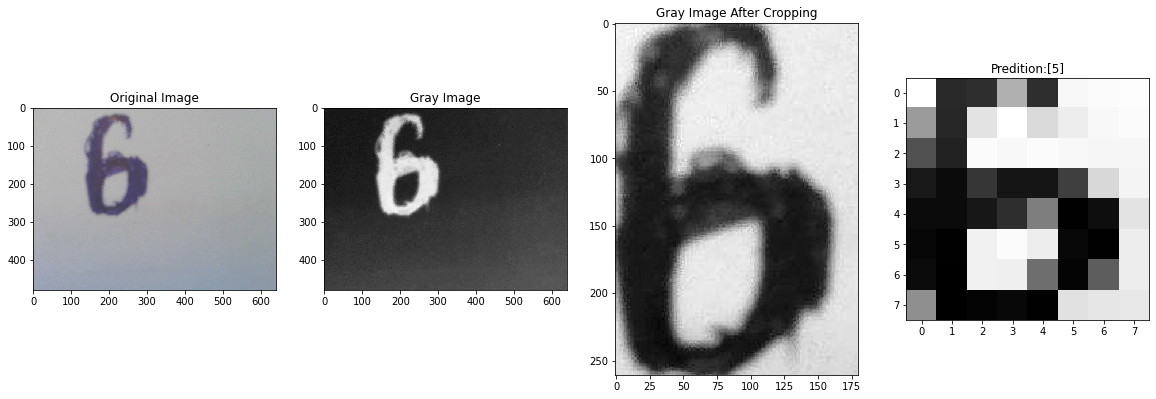

In [ ]:
import os

#dẫn link tập dữ liệu mà chúng em tự thu thập
path_test = '/content/drive/MyDrive/CS114.L21/data_digits_number/'
_data_test = os.listdir(path=path_test)

#đếm số lượng của hình ảnh có trong tập dữ liệu
n_tests = len(_data_test)
print ("Số lượng hình ảnh trong tập dữ liệu:", n_tests)

#tiến hành vòng lặp chạy qua từng hình ảnh để xử lý và dự đoán hình sử dụng model nhận diện chữ số viết tay của sklearn
for i in range(n_tests):
  __path = path_test + _data_test[i]
 
 #truy xuất hình ảnh trong tệp chưa qua xử lý
  _, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 10))
  ax_ori = axes[0]
  original = cv2.imread(__path)
  ax_ori.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB), interpolation='nearest')
  ax_ori.set_title(f'Original Image')

 #truy xuất hình ảnh trong tệp sau bước xử lý sang màu đen trắng
  ax_ori = axes[1]
  gray_original = cv2.imread(__path,0)
  ax_ori.imshow(gray_original, cmap=plt.cm.gray_r, interpolation='nearest')
  ax_ori.set_title(f'Gray Image')


 #cắt hình ảnh từ hình ảnh trắng đen theo quy tắc loại bỏ các pixels trắng ở mức tối thiểu, chỉ để tâm đến các pixels đen ở hàm crop_img ở trên
  ax_ori = axes[2]
  crop_original = crop_img(gray_original)
  ax_ori.imshow(crop_original, cmap=plt.cm.gray_r, interpolation='nearest')
  ax_ori.set_title(f'Gray Image After Cropping')
  
 #vì hình đọc từ open cv sẽ có tỉ lệ rơi vào khoảng [0,255] để tương thích với model của sklearn ta phải scale hình về tỉ lệ [0,16] và resize hình về size (8,8) pixels
  ax_ori = axes[3]
  resized_img = cv2.resize(crop_original,(8,8))
  scaled_img = resized_img/16
  predicted_our_datas = clf.predict(scaled_img.reshape(1,64)) #dự đoán hình ảnh từ tập dữ liệu sau khi đã qua tất cả các bước tiền xử lý
  ax_ori.imshow(resized_img, cmap=plt.cm.gray_r, interpolation='nearest')
  ax_ori.set_title(f'Predition:{predicted_our_datas}')


# Tổng kết bài tập:
1. Kết quả chạy thức tế với webcam của laptop và giấy viết tay của các bạn có tốt không?

  Không tốt
2. Ủa mà nhìn vào đâu để kết luận là tốt hay không?

  Ảnh chụp webcam của laptop phải qua nhiều bước xử lý hình ảnh để có thể cho máy nhận diện. Và kết quả trả về của độ chính xác rất thấp (chỉ đúng 6/25 ảnh từ bộ dữ liệu tự thu thập)
3. Nếu không tốt thì lý do tại sao?

  Ảnh phải qua nhiều bước xử lý. Xem chi tiết ở phần [Tiền xử lý hình ảnh](#xulyhinhanh)

  + Ảnh chụp từ camera laptop sẽ có dạng hình chữ nhật, khi xử lý về hình vuông sẽ làm méo ảnh
  + Quá trình resize khiến ảnh bị mất dữ liệu
  + Việc xử lý màu, nhiễu,.. ảnh hưởng rất nhiều tới kết thông tin của hình ảnh. Ví dụ ở hình

  Ảnh được chụp bị tác động bởi nhiều yếu tố xung quanh:
  + Độ đậm nhạt của nét chữ, màu chữ (bước cắt hình của chúng em chỉ phân biệt tốt giữa pixels đen và trắng và bộ dữ liệu là màu chữ đen nên hình màu chữ khác kết quả nhận diện sẽ không đúng.
  + Nền chữ bị nhiễu (kẻ ô vuông, có gạch ngang,...) cũng làm giảm thiểu độ chính xác của model
  + Độ sáng của môi trường, chất lượng hình ảnh (hình chụp bị dính bóng thiết bị chụp, gặp đồ vật mà khi xử lý bị nhầm lẫn sang pixels đen dẫn đến cắt hình không chính xác,...)
  + Góc chụp của webcam (nghiêng, không chính diện mặt chữ,...)

  => Model digits recognition hoạt động **không tốt** với dữ liệu ảnh được chụp từ laptop và trong các trường hợp thực tế.
4. Nếu tốt thì tiếp theo có thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà không?

  Không thể. Vì kết quả trả về với ảnh chụp từ webcam cho độ chính xác rất thấp => Đối với ảnh từ các thiết bị chụp ảnh hiện nay cũng sẽ bị ảnh hưởng tương tự

  Tuy nhiên, nếu dữ liệu ảnh của biển số nhà phù hợp với dữ liệu train của model thì có thể, vì theo Confusion Matrix được thể hiện ở trên, với dữ liệu phù hợp thì độ chính xác cao (trên 79%)